In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('loan_prediction.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
data.drop(['Loan_ID'], inplace=True, axis=1)

# Univariate Analysis

In [8]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

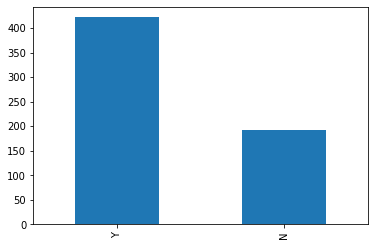

In [9]:
data['Loan_Status'].value_counts().plot.bar()

In [10]:
categorical_columns = data.select_dtypes(['object']).columns

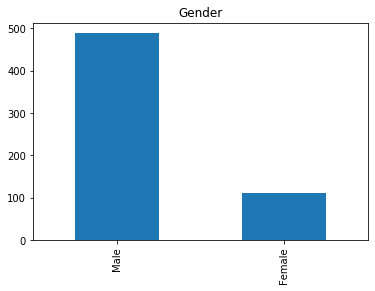

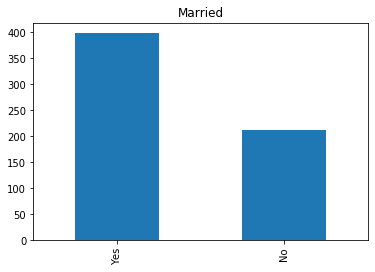

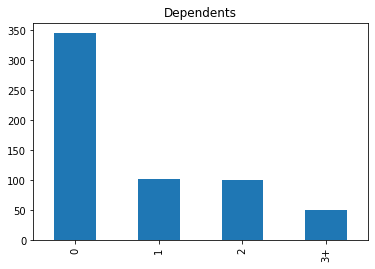

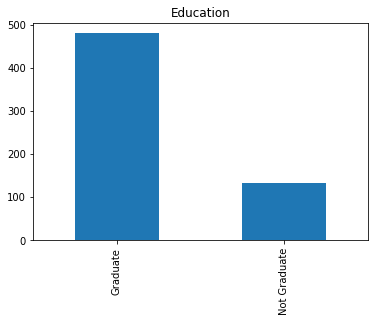

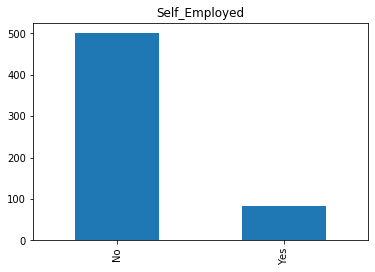

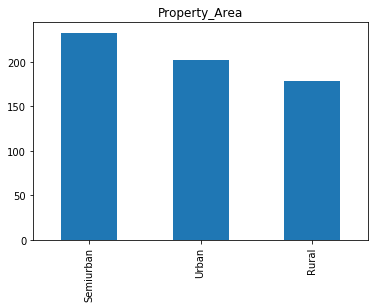

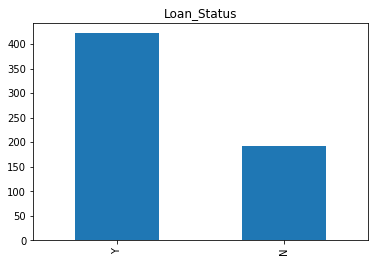

In [11]:
for col in categorical_columns:
    data[col].value_counts().plot.bar(title=col)
    plt.show()

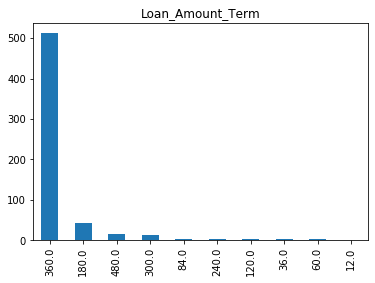

In [12]:
data['Loan_Amount_Term'].value_counts().plot.bar(title='Loan_Amount_Term')

# Bivariate Analysis

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


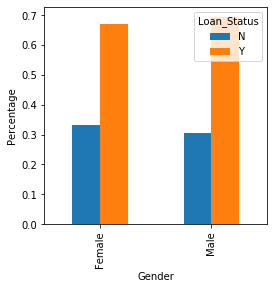

In [13]:
gender_stats = pd.crosstab(data['Gender'],data['Loan_Status'])
print(gender_stats)
gender_stats.div(gender_stats.sum(1).astype(float), axis = 0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


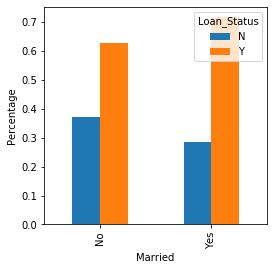

In [14]:
married_stats = pd.crosstab(data.Married,data.Loan_Status)
print(married_stats)
married_stats.div(married_stats.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


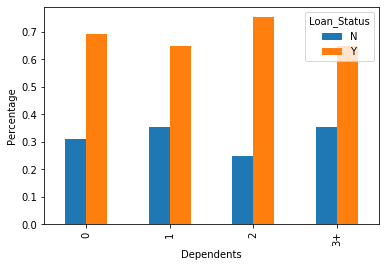

In [15]:
dependents_stats=pd.crosstab(data.Dependents, data.Loan_Status)
print(dependents_stats)
dependents_stats.div(dependents_stats.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


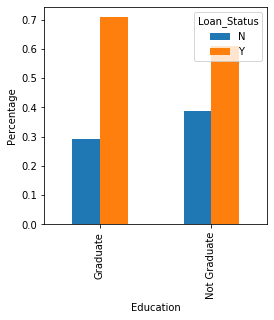

In [16]:
education_stats=pd.crosstab(data.Education, data.Loan_Status)
print(education_stats)
education_stats.div(education_stats.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


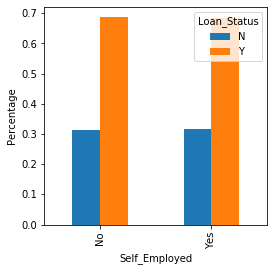

In [17]:
self_employed_stats=pd.crosstab(data.Self_Employed,data.Loan_Status)
print(self_employed_stats)
self_employed_stats.div(self_employed_stats.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


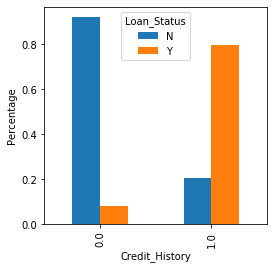

In [18]:
credit_history_stats=pd.crosstab(data.Credit_History,data.Loan_Status)
print(credit_history_stats)
credit_history_stats.div(credit_history_stats.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


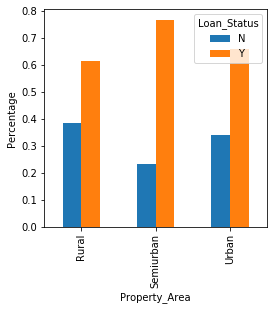

In [19]:
property_area_stats=pd.crosstab(data.Property_Area,data.Loan_Status)
print(property_area_stats)
property_area_stats.div(property_area_stats.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

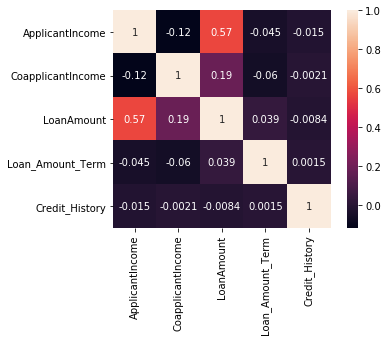

In [20]:
sns.heatmap(data.corr(), vmax=1, square=True, annot=True)

In [21]:
#Converting Crdit History to Object dtype
data.Credit_History = data.Credit_History.astype('object', copy=False)

# Imputing Missing Values

In [22]:
categorical_columns = data.select_dtypes(['object']).columns

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [25]:
for col in categorical_columns:
    data[col] = cat_imputer.fit_transform(data[[col]])

In [26]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
data.Loan_Amount_Term = cat_imputer.fit_transform(data[['Loan_Amount_Term']])

In [28]:
#Imputing integer columns using mean
int_columns = ['LoanAmount']
int_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for col in int_columns:
    data[col] = int_imputer.fit_transform(data[[col]])

In [29]:
#creating_dummies
data = pd.get_dummies(data, columns = categorical_columns[:-1], prefix= categorical_columns[:-1], drop_first=True)

In [30]:
categorical_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [31]:
data['Loan_Status'].replace('Y', 1, inplace=True)
data['Loan_Status'].replace('N', 0, inplace=True)

In [32]:
data.shape

(614, 15)

In [33]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1,1,0,0,0,0,0,0,1,0,1
1,4583,1508.0,128.000000,360.0,0,1,1,1,0,0,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1,1,1,0,0,0,0,1,1,0,1
3,2583,2358.0,120.000000,360.0,1,1,1,0,0,0,1,0,1,0,1
4,6000,0.0,141.000000,360.0,1,1,0,0,0,0,0,0,1,0,1


In [34]:
X = data.drop(['Loan_Status'], axis=1)
Y = data.loc[:,'Loan_Status']

In [35]:
print(X.shape, Y.shape)

(614, 14) (614,)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [38]:
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
90,2958,2900.0,131.0,360.0,1,1,0,0,0,0,0,1,1,0
533,11250,0.0,196.0,360.0,1,0,1,0,0,0,0,1,1,0
452,3948,1733.0,149.0,360.0,1,1,0,0,0,0,0,0,0,0
355,3813,0.0,116.0,180.0,0,0,0,0,0,0,0,1,0,1
266,4708,1387.0,150.0,360.0,1,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,3103,1300.0,80.0,360.0,1,1,0,0,0,0,0,1,0,1
9,12841,10968.0,349.0,360.0,1,1,1,0,0,0,0,1,1,0
359,5167,3167.0,200.0,360.0,1,1,0,0,1,0,0,1,1,0
192,6033,0.0,160.0,360.0,1,1,0,0,0,1,0,1,0,1


# Logistic Regression

In [39]:
lr_classifier = LogisticRegression(random_state=0)

In [40]:
lr_classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
lr_pred = lr_classifier.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(Y_test, lr_pred)

array([[16, 17],
       [ 3, 87]], dtype=int64)

In [44]:
lr_classifier.classes_

array([0, 1], dtype=int64)

In [45]:
accuracy_score(Y_test, lr_pred)

0.8373983739837398

In [46]:
roc_auc_score(Y_test, lr_pred)

0.7257575757575758

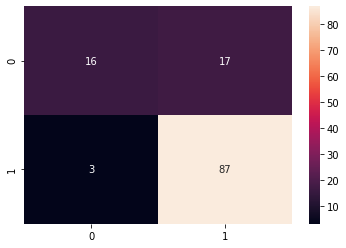

In [47]:
sns.heatmap(confusion_matrix(Y_test, lr_pred), annot=True)

# GridSearchCV of LR

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
model = LogisticRegression(fit_intercept=True)
params = {
    'class_weight':['balanced', None],
    'C':np.linspace(0.01, 1000, 10),
    'penalty': ['l1', 'l2']
}

In [50]:
lr_search = GridSearchCV(model, param_grid=params, cv=10, scoring="accuracy")

In [51]:
lr_search.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.0000e-02, 1.1112e+02, 2.2223e+02, 3.3334e+02, 4.4445e+02,
       5.5556e+02, 6.6667e+02, 7.7778e+02, 8.8889e+02, 1.0000e+03]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fals

In [52]:
logr = lr_search.best_estimator_

In [53]:
logr.fit(X_train, Y_train)

LogisticRegression(C=111.12, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
logr.score(X_train, Y_train)

0.8085539714867617

In [55]:
lr_pred = logr.predict(X_test)

In [56]:
accuracy_score(Y_test, lr_pred)

0.8373983739837398

In [57]:
confusion_matrix(Y_test, lr_pred)

array([[15, 18],
       [ 2, 88]], dtype=int64)

# Finding Cuttoff using KS

In [58]:
train_score = logr.predict_proba(X_train)[:,1]
real = Y_train

In [59]:
cutoffs = np.linspace(0.1, 0.99, 99)

In [60]:
ks_all = []
for cutoff in cutoffs:
    predicted = (train_score>cutoff).astype(int)
    TP = ((predicted == 1) & (real == 1)).sum()
    TN = ((predicted == 0) & (real == 0)).sum()
    FP = ((predicted == 1) & (real == 0)).sum()
    FN = ((predicted == 0) & (real == 1)).sum()
    
    P = TP + FN
    N = TN + FP
    
    ks = (TP/P) - (FP/N)
    ks_all.append(ks)


In [61]:
mycutoff = cutoffs[ks_all == max(ks_all)][0]

In [62]:
mycutoff

0.6903061224489796

In [63]:
roc_auc_score(Y_test, lr_pred)

0.7161616161616162

In [64]:
list(zip(X_train.columns, logr.coef_[0]))

[('ApplicantIncome', 6.6512489410036096e-06),
 ('CoapplicantIncome', -7.533520948280198e-05),
 ('LoanAmount', -0.0018789132721092974),
 ('Loan_Amount_Term', -0.006448829241715304),
 ('Gender_Male', -0.1518950348389257),
 ('Married_Yes', 0.27175681269820123),
 ('Dependents_1', -0.3055923385291353),
 ('Dependents_2', 0.13262773294163674),
 ('Dependents_3+', 0.1401763260894777),
 ('Education_Not Graduate', -0.6032507223035914),
 ('Self_Employed_Yes', 0.046357940535950784),
 ('Credit_History_1.0', 3.508402046570024),
 ('Property_Area_Semiurban', 0.7432821859033756),
 ('Property_Area_Urban', 0.20649335910762545)]

In [65]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



# Decision Trees

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, class_weight='balanced')

In [68]:
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

In [69]:
dt_pred = dt_classifier.predict(X_test)

In [70]:
accuracy_score(Y_test, dt_pred)

0.7154471544715447

In [71]:
#Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [72]:
params = {
    'class_weight': [None, 'balanced'],
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 5, 10, 15, 20, 30, 50]
}

In [73]:
classifier = DecisionTreeClassifier()

In [74]:
dt_search = RandomizedSearchCV(classifier, param_distributions=params, scoring='accuracy', n_iter=20)

In [75]:
dt_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
       

In [76]:
dt_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
dt_classifier = dt_search.best_estimator_

In [78]:
dt_pred = dt_classifier.predict(X_test)

In [79]:
accuracy_score(Y_test, dt_pred)

0.8048780487804879

In [80]:
confusion_matrix(Y_test, dt_pred)

array([[14, 19],
       [ 5, 85]], dtype=int64)

In [81]:
type(dt_classifier.max_features)

NoneType

In [82]:
from sklearn.tree import export_graphviz

In [83]:
dotfile = open('dtree.dot', 'w')
export_graphviz(dt_classifier, out_file=dotfile,
               feature_names=X_train.columns,
               class_names=['0', '1'],
               proportion=True)
dotfile.close()

# Random Forest 

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf_classifier = RandomForestClassifier(verbose=1, n_jobs=-1)

In [86]:
param_dist = {
    'n_estimators':[100,200,300],
    'max_features':[5,10],
    'bootstrap':[True, False],
    'class_weight':[None,'balanced'],
    'criterion':['gini','entropy']
}

In [87]:
rf_classifier = RandomizedSearchCV(rf_classifier, param_distributions=param_dist,
                                      n_iter=10, scoring='accuracy', cv=10)

In [88]:
rf_classifier.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend L

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [89]:
rf_classifier.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [90]:
rf_classifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [91]:
rf_classifier.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.9s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [92]:
rf_pred = rf_classifier.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


In [93]:
accuracy_score(Y_test, rf_pred)

0.8130081300813008

In [94]:
imp_feature = pd.DataFrame({'features': X_train.columns, 'importance': rf_classifier.feature_importances_})
imp_feature.sort_values('importance', ascending=False)

,features,importance
11,Credit_History_1.0,0.281119
0,ApplicantIncome,0.199736
2,LoanAmount,0.181958
1,CoapplicantIncome,0.110860
3,Loan_Amount_Term,0.038006
12,Property_Area_Semiurban,0.025528
5,Married_Yes,0.024798
9,Education_Not Graduate,0.024042
13,Property_Area_Urban,0.022813
6,Dependents_1,0.022322


# XGBOOST

In [95]:
from xgboost import XGBClassifier

In [96]:
params = {
    'learning_rate':[0.01,0.05,0.1,0.3,0.5],
    'gama':[i/10.0 for i in range(0,5)],
    'min_child_weight':[1,2,5,10],
    'min_delta_step':[0,1,2,5,10],
    'subsample':[i/10.0 for i in range(5,10)],
    'colsample_bytree':[i/10.0 for i in range(5,10)],
    'colsample_bylevel':[i/10.0 for i in range(5,10)],
    'reg_lambda':[1e-5,1e-2,0.1,1,100],
    'reg_alpha':[1e-5,1e-2,0.1,1,100],
    'scale_pos_weight':[1,2,3,4,5,6,7,8,9],
    'n_estimators':[100,300,500]
}

In [97]:
xgb_classifier = XGBClassifier(objective='binary:logistic')

In [98]:
xgb_search = RandomizedSearchCV(xgb_classifier, n_jobs=-1, cv=5, n_iter=50, 
                                  scoring='accuracy', param_distributions=params)

In [99]:
xgb_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5],
                                    

In [100]:
xgb_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=0.6,
              colsample_bynode=1, colsample_bytree=0.6, gama=0.0, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=5, min_delta_step=10, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=100, scale_pos_weight=4, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [101]:
xgb_pred = xgb_search.predict(X_test)

In [102]:
accuracy_score(Y_test, xgb_pred)

0.8292682926829268

In [103]:
roc_auc_score(Y_test, xgb_pred)

0.7010101010101011

In [104]:
confusion_matrix(Y_test, xgb_pred)

array([[14, 19],
       [ 2, 88]], dtype=int64)

# Conclusion

In [105]:
final_model = lr_classifier.fit(X, Y)